# Descriptive Analysis

When trying to understand your data, it is typically impossible to just look at raw data and get much insight. We need ways to turn a bunch of data into a smaller set of numbers that are easily digestible summaries of your data. This will make them understandable both for you and for the people you work with. We call these **descriptive statistics**.

## Objectives

- Use business context to guide exploratory analyses
- Pose clear business-relevant questions and answer them with data
- Identify limitations of data for solving business problems

In [80]:
# Imports!
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

## Sample Data

Let's build a simple dataset, based on a hypothetical survey of the number of pairs of shoes owned by 11 random people:

In [81]:
data = np.array([5, 6, 3, 4, 3, 4, 8, 8, 1, 8, 2])
data_df = pd.DataFrame(data, columns=["Pairs of Shoes"])

In [82]:
data_df

,Pairs of Shoes
0,5
1,6
2,3
3,4
4,3
5,4
6,8
7,8
8,1
9,8


## `df.describe()`

This dataset has a bunch of individual observations in a range of values. These observations have an **empirical distribution** describing how the values are distributed across this range. We'll shorten this to just **distribution** for now. Everything that follows is our attempt to understand the distribution of our data.

You can actually get a bunch of descriptive statistics from any `pandas` DataFrame using the `.describe()` method. This should be one of the first things you'll do when exploring a new dataset.

In [83]:
data_df.describe()

,Pairs of Shoes
count,11.000000
mean,4.727273
std,2.493628
min,1.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,8.000000


# Different Statistical Measures

## Measures of Center

One natural place to begin is to ask about where the **middle** of the data is. In other words, what is the value that is closest to our other values? 

There are three common measures used to describe the "middle":

- **Mean**: The sum of values / number of values
- **Median**: The value with as many values above it as below it
    - If the dataset has an even number of values, the median is the mean of the two middle numbers.
- **Mode**: The most frequent value(s)
    - A dataset can have multiple modes if multiple values are tied for the most frequent.

Let's see what we have for our example:

In [84]:
data_df.mean()

Pairs of Shoes    4.727273
dtype: float64

In [85]:
data_df.mean()[0]

4.7272727272727275

In [86]:
print(f"Mean: {data_df.mean()}")
print("*"*20)
print(f"Median: {data_df.median()}")
print("*"*20)
print(f"Mode: {data_df.mode()}")

Mean: Pairs of Shoes    4.727273
dtype: float64
********************
Median: Pairs of Shoes    4.0
dtype: float64
********************
Mode:    Pairs of Shoes
0               8


**Discussion**: If somebody asked you "How many pairs of shoes do people usually have?", how would you answer (based on these data)?

- 


## Measures of Spread

Another natural question is about the **spread** of the data. In other words, how wide a range of values do you have? And how close or far are they from the "middle"?

### Min, Max, and Range

The minimum and maximum values of a dataset tell you the full extent of the values of your dataset. The range of the dataset is the difference between those two values.

In [87]:
print(f"Min: {data.min()}")
print(f"Max: {data.max()}")
print(f"Range: {data.max() - data.min()}")

Min: 1
Max: 8
Range: 7


### Percentiles and IQR

You can also calculate values at various **percentiles** to understand the spread. An "Nth Percentile" value is the value that is greater than N% of other values. The 25th and 75th percentiles are commonly used to describe spread, and the **interquartile range (IQR)** is the difference between these two values.

See [the docs](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html) for more specifics about how percentiles are calculated, which is surprisingly tricky.

In [88]:
print(f"25th Percentile: {np.percentile(data, 25)}")
print(f"75th Percentile: {np.percentile(data, 75)}")
print(f"IQR: {np.percentile(data, 75) - np.percentile(data, 25)}")

25th Percentile: 3.0
75th Percentile: 7.0
IQR: 4.0


### Standard Deviation

The **standard deviation** is in effect the distance from the mean of the "average" data point. It is defined as: $$\sqrt\frac{\Sigma(x_i - \bar{x})^2}{n}$$

In [89]:
print(f"Standard Deviation: {data.std()}")

Standard Deviation: 2.3775812419312765


In [90]:
data_df.std()

Pairs of Shoes    2.493628
dtype: float64

In [91]:
np.std(data)#, ddof=1) #degree of freedom is implied 

2.3775812419312765

In [92]:
#**very important to know the default degree of freedom for different libr.)

# Visual Description

A picture is worth a thousand words - or numbers! Here we will show how to use histograms and box-and-whisker plots to describe your data.

## Histograms

One natural way of starting to understand a dataset is to construct a **histogram**, which is a bar chart showing the counts of the different values in the dataset.

There will usually be many distinct values in your dataset, and you will need to decide how many **bins** to use in the histogram. The bins define the ranges of values captured in each bar in your chart. 

<AxesSubplot:ylabel='Count'>

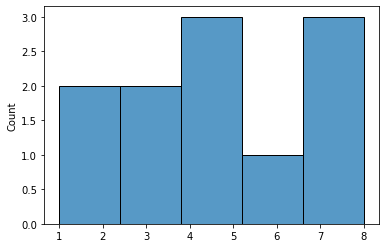

In [93]:
#seaborns version

sns.histplot(data)

Text(0.5, 1.0, 'Counts, 14 Bins')

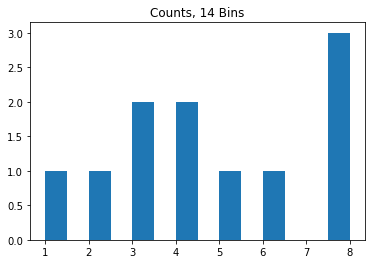

In [94]:
fig, ax = plt.subplots()
ax.hist(data, bins=14)
plt.title('Counts, 14 Bins')

Text(0.5, 1.0, 'Counts, 10 Bins')

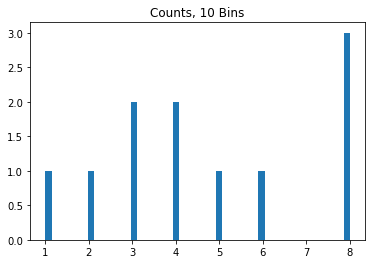

In [95]:
fig, ax = plt.subplots()
ax.hist(data, bins=50)
plt.title('Counts, 10 Bins')

Text(0.5, 1.0, 'Counts, 5 Bins')

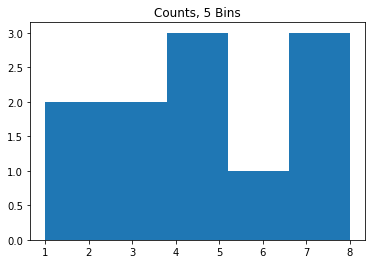

In [96]:
fig, ax = plt.subplots()
ax.hist(data, bins=5)
plt.title('Counts, 5 Bins')

Text(0.5, 1.0, 'Counts, 2 Bins')

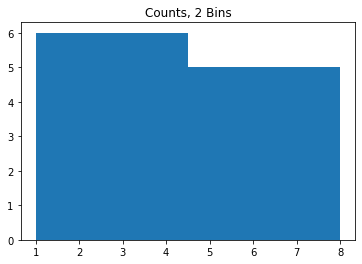

In [97]:
fig, ax = plt.subplots()
ax.hist(data, bins=2)
plt.title('Counts, 2 Bins')

## Box and Whisker Plot

A box-and-whisker plot can also be useful for visually summarizing your data by showing the min, IQR, and max.

In [98]:
#DO NOT use these in non-technical presentations 

Text(0.5, 1.0, 'Counts of Pairs of Shoes')

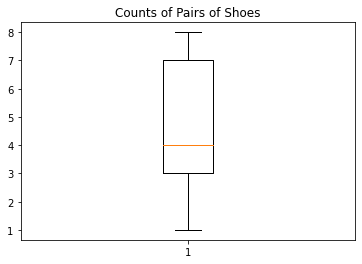

In [99]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.title('Counts of Pairs of Shoes')

# Addressing Business Questions

## Fast Food Data

In [100]:
ffood = pd.read_csv('data/Datafiniti_Fast_Food.csv')

In [101]:
ffood.head()

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
2,AVwcopQoByjofQCxgfVa,2016-03-29T05:06:36Z,2018-06-26T02:59:52Z,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,US,us/tn/pigeonforge/206wearsvalleyrd/-864103396,35.803788,-83.580553,Taco Bell,37863,TN,https://www.yellowpages.com/pigeon-forge-tn/mi...,"http://www.tacobell.com,https://locations.taco..."
3,AVweXN5RByjofQCxxilK,2017-01-03T07:46:11Z,2018-06-26T02:59:51Z,3652 Parkway,Fast Food,Pigeon Forge,US,us/tn/pigeonforge/3652parkway/93075755,35.782339,-83.551408,Arby's,37863,TN,http://www.yellowbook.com/profile/arbys_163389...,"http://www.arbys.com,https://locations.arbys.c..."
4,AWQ6MUvo3-Khe5l_j3SG,2018-06-26T02:59:43Z,2018-06-26T02:59:43Z,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,US,us/ga/morrow/2118mtzionparkway/1305117222,33.562738,-84.321143,Steak 'n Shake,30260,GA,https://foursquare.com/v/steak-n-shake/4bcf77a...,http://www.steaknshake.com/locations/23851-ste...


In [102]:
ffood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
dtypes: float64(2), object(13)
memory usage: 1.1+ MB


In [103]:
ffood.describe(include = ['O'])

,id,dateAdded,dateUpdated,address,categories,city,country,keys,name,postalCode,province,sourceURLs,websites
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9343,8960,7052,9302,324,2764,1,9343,571,5429,50,9338,4136
top,AVwdiX0skufWRAb563Xt,2017-06-19T14:48:37Z,2018-06-19T09:42:27Z,3100 Riverside Dr,Fast Food Restaurant,Houston,US,us/ga/macon/3100riversidedr/93075755,McDonald's,78209,CA,There are too many sourceURLs objects to show....,"http://mcdonalds.com,http://www.mcdonalds.com/..."
freq,4,6,12,4,3425,107,10000,4,1898,10,1201,6,830


### Question 1

How many different restaurant chains are represented in the data? Visualize the numbers for the restaurants with 50 or more instances.

In [104]:
# Your code here
ffood['name']

0       SONIC Drive In
1       SONIC Drive In
2            Taco Bell
3               Arby's
4       Steak 'n Shake
             ...      
9995         Pizza Hut
9996         Pizza Hut
9997         Pizza Hut
9998         Pizza Hut
9999         Pizza Hut
Name: name, Length: 10000, dtype: object

In [105]:
len(ffood['name'].unique())

571

In [106]:
counts = ffood['name'].value_counts()

counts

McDonald's                        1898
Taco Bell                         1032
Burger King                        833
Subway                             776
Arby's                             663
                                  ... 
D & M Subs                           1
Tony Wang's Chinese Restaurant       1
Arthur Treacher's Fish & Chips       1
Bistro To Go                         1
Stoko's                              1
Name: name, Length: 571, dtype: int64

In [107]:
counts >= 50

McDonald's                         True
Taco Bell                          True
Burger King                        True
Subway                             True
Arby's                             True
                                  ...  
D & M Subs                        False
Tony Wang's Chinese Restaurant    False
Arthur Treacher's Fish & Chips    False
Bistro To Go                      False
Stoko's                           False
Name: name, Length: 571, dtype: bool

In [108]:
counts.loc[counts >= 50]

McDonald's         1898
Taco Bell          1032
Burger King         833
Subway              776
Arby's              663
Wendy's             628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Domino's Pizza      215
Chick-fil-A         206
KFC                 162
SONIC Drive In      125
Jimmy John's        119
Carl's Jr.          112
Hardee's             99
Krystal              82
Panera Bread         76
Culver's             71
Dunkin' Donuts       71
Del Taco             66
Panda Express        61
SUBWAY               57
In-N-Out Burger      54
Steak 'n Shake       54
Taco John's          53
Sonic Drive-In       50
Name: name, dtype: int64

In [109]:
#works the same as above ... .loc implied"from this counts object, i want you to find the place
#where the counts object is greater than or equal to 50"
high_counts = counts[counts >= 50] 

In [110]:
high_counts

McDonald's         1898
Taco Bell          1032
Burger King         833
Subway              776
Arby's              663
Wendy's             628
Jack in the Box     330
Pizza Hut           230
Dairy Queen         218
Domino's Pizza      215
Chick-fil-A         206
KFC                 162
SONIC Drive In      125
Jimmy John's        119
Carl's Jr.          112
Hardee's             99
Krystal              82
Panera Bread         76
Culver's             71
Dunkin' Donuts       71
Del Taco             66
Panda Express        61
SUBWAY               57
In-N-Out Burger      54
Steak 'n Shake       54
Taco John's          53
Sonic Drive-In       50
Name: name, dtype: int64

<AxesSubplot:>

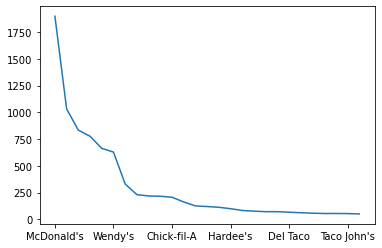

In [111]:
high_counts.plot()

<AxesSubplot:>

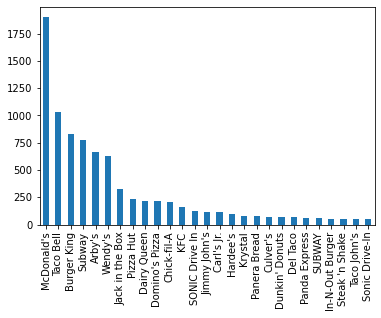

In [112]:
high_counts.plot(kind='bar')

<AxesSubplot:>

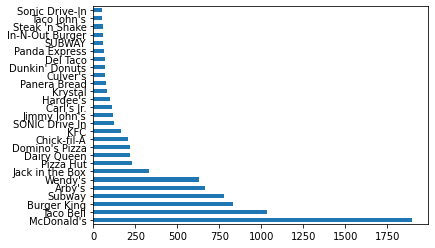

In [113]:
high_counts.plot(kind='barh')

<BarContainer object of 27 artists>

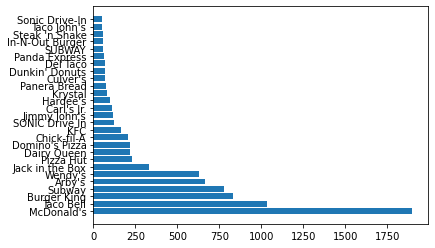

In [114]:
fig, ax = plt.subplots()

ax.barh(y=high_counts.index, width=high_counts)

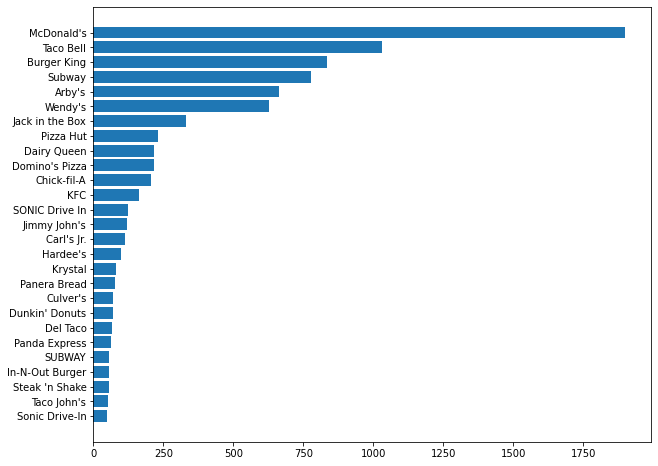

In [115]:
fig, ax = plt.subplots(figsize=(10,8))

ax.barh(y=high_counts.index, width=high_counts)
ax.invert_yaxis()

In [116]:
#why its important to set a variable like 'high counts' - it allows you to change that one
#number or variable and the rest will follow 

### Question 2

Visualize the locations of restaurants in Buffalo, NY.

In [128]:
# Your code here
ffood.head()
buffalo = ffood.loc[ffood['city'] == "Buffalo"]

#buffalo = ffood.loc[ffood['city'] == "Buffalo"]['province'] -more specific 


<AxesSubplot:xlabel='latitude', ylabel='longitude'>

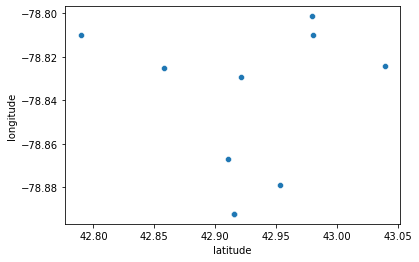

In [129]:
sns.scatterplot(data=buffalo, x='latitude', y='longitude')

### Your Turn: First Exercise!

In a breakout room, work on questions 3-5 below:

### Question 3

In this dataset, how many Taco Bell restaurants are there in Alaska, and in which cities are they?

In [130]:
# Your code here
ffood.loc[(ffood['province']=="AK") & (ffood['name']=='Taco Bell')]

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
8497,AVwc9pgFIN2L1WUfqyrq,2015-12-17T19:04:28Z,2018-04-30T09:35:14Z,1453 University Ave S,Fast Food,Fairbanks,US,us/ak/fairbanks/1453universityaves/-864103396,64.835505,-147.81325,Taco Bell,99709,AK,http://www.citysearch.com/profile/1335940/fair...,"http://www.tacobell.com,https://locations.taco..."
8498,AVwc9pgFIN2L1WUfqyrq,2015-12-17T19:04:28Z,2018-04-30T09:35:14Z,1453 University Ave S,Fast Food Restaurant,Fairbanks,US,us/ak/fairbanks/1453universityaves/-864103396,64.835505,-147.81325,Taco Bell,99709,AK,http://www.citysearch.com/profile/1335940/fair...,"http://www.tacobell.com,https://locations.taco..."
9789,AVzA-GFMFcQ3k02bBaLW,2017-06-19T15:28:42Z,2018-04-10T06:49:29Z,9001 Jewel Lake Rd Ste 12,Fast Food Restaurant,Anchorage,US,us/ak/anchorage/9001jewellakerdste12/-864103396,61.138300,-149.95040,Taco Bell,99502,AK,https://foursquare.com/v/taco-bell/4bc23f7af82...,"http://www.tacobell.com,https://locations.taco..."


In [131]:
ak_tacos = ffood.loc[(ffood['province']=="AK") & (ffood['name']=='Taco Bell')]

In [136]:
ak_tacos['city'].unique

<bound method Series.unique of 8497    Fairbanks
8498    Fairbanks
9789    Anchorage
Name: city, dtype: object>

In [142]:
len(ak_tacos.drop_duplicates(subset=['id']))

2

### Question 4

Convert the ZIP Codes to (five-digit) integers.

In [155]:
ffood['postalCode'].str[:5]

0       70301
1       70301
2       37863
3       37863
4       30260
        ...  
9995    27106
9996    27107
9997    27284
9998    27893
9999    28337
Name: postalCode, Length: 10000, dtype: object

In [156]:
ffood['zip'] = ffood['postalCode'].str[0:5].astype(int)

In [157]:
ffood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  object 
 1   dateAdded    10000 non-null  object 
 2   dateUpdated  10000 non-null  object 
 3   address      10000 non-null  object 
 4   categories   10000 non-null  object 
 5   city         10000 non-null  object 
 6   country      10000 non-null  object 
 7   keys         10000 non-null  object 
 8   latitude     10000 non-null  float64
 9   longitude    10000 non-null  float64
 10  name         10000 non-null  object 
 11  postalCode   10000 non-null  object 
 12  province     10000 non-null  object 
 13  sourceURLs   10000 non-null  object 
 14  websites     10000 non-null  object 
 15  zip          10000 non-null  int64  
dtypes: float64(2), int64(1), object(13)
memory usage: 1.2+ MB


In [159]:
# Your code here


### Question 5

Which restaurant chain has the greatest representation in San Francisco, CA? (This city covers all the ZIP Codes between 94100 and 94188, inclusive)

In [164]:
# Your code here
sanfran = ffood.loc[(ffood['zip'] >= 94100) &  (ffood['zip'] <= 94188)]

In [165]:
sanfran['name'].value_counts()

Subway                     5
Burger King                2
Panda Express              1
Domino's Pizza             1
De Afghanan Kabob House    1
McDonald's                 1
Batter Up                  1
VeganBurg                  1
Pollo Campero              1
Chipotle Mexican Grill     1
Taqueria                   1
Name: name, dtype: int64

In [167]:
sanfran['city'].unique()

array(['San Francisco'], dtype=object)

## Credit Card Data

In [ ]:
credit = pd.read_csv('data/BankChurners.csv').iloc[:, :-2]

In [ ]:
credit.head()

In [ ]:
credit.describe()

In [ ]:
credit['Attrition_Flag'].value_counts()

We work for a credit card company and are worried about customers churning (becoming attrited).

### Your Turn: Second Exercise!

In breakout rooms, work on questions 1-3 below:

### Question 1

Get the means of the numerical columns for the existing and the attrited customers separately.

In [ ]:
# Your code here

### Question 2

Visualize the distributions of total revolving balances for each group.

In [ ]:
# Your code here

### Question 3

Make two bar charts counting the numbers in each income category for each group separately.

In [ ]:
# Your code here

# Level Up: Other Shape Descriptors

Here are a few other ways that people describe the distributions of data.

## Moments

The mean is related to $\Sigma(x_i - \bar{x})$ while the standard deviation is related to $\Sigma(x_i - \bar{x})^2$. We could consider higher exponents as well, of the form $\Sigma(x_i - \bar{x})^n$. For each exponent $n>0$, we can define a related statistical **moment**. For $n=3$, the moment is called the **skewness**, which is a measure of how the mean and median diverge. For $n=4$, the moment is called the **kurtosis**, which is a measure of how many values are relatively far from the mean.

There are a few different definitions of skewness and kurtosis that are commonly used, but the basic quantities are:

- $\frac{\Sigma(x_i - \bar{x})^3}{n\sigma^3}$ (for skewness)
- $\frac{\Sigma(x_i - \bar{x})^4}{n\sigma^4}$ (for kurtosis)

For more on statistical moments, see [here](https://www.statisticshowto.datasciencecentral.com/what-is-a-moment/) and [here](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics).

In [ ]:
# Will need the scipy stats library for these
from scipy import stats

### Skewness

![skew](images/skew.png)

In [ ]:
stats.skew(data)

### Kurtosis

![kurt](images/kurtosis.png)

In [ ]:
stats.kurtosis(data)

What if we want to visualize the three histograms together?

## Symmetry

In [ ]:
X = np.linspace(-3, 3, 40)
y = stats.norm.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
ax.vlines(x=0, ymin=0, ymax=0.5, colors = "black")
plt.title('Symmetric Distribution');

X = np.linspace(0, 1, 40)
y = stats.expon.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Asymmetric Distribution');

## Modality

In [ ]:
X = np.linspace(0, 1, 40)
y = stats.uniform.pdf(X) + 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.ylim(0.5, 1.5)
plt.title('Flat Distribution');

X = np.linspace(-5, 5, 40)
y = stats.norm.pdf(X, loc=-2) + stats.norm.pdf(X, loc=2)\
+ 0.05 * np.random.rand(40)

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(X, y, lw=5)
plt.title('Bimodal Distribution');